In [29]:
import numpy as np
import cv2
from scipy.ndimage import label
import sys

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations=5)
    border = border - cv2.erode(border, None)

    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(numpy.uint8)
    _, dt = cv2.threshold(dt, 180, 255, cv2.THRESH_BINARY)
    lbl, ncc = label(dt)
    lbl = lbl * (255 / (ncc + 1))
    # Completing the markers now. 
    lbl[border == 255] = 255

    lbl = lbl.astype(numpy.int32)
    cv2.watershed(a, lbl)

    lbl[lbl == -1] = 0
    lbl = lbl.astype(numpy.uint8)
    return 255 - lbl

In [24]:
img = cv2.imread('200x_1010_T.tif')

In [25]:
# Pre-processing.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
_, img_bin = cv2.threshold(img_gray, 0, 255,cv2.THRESH_OTSU)
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN,numpy.ones((3, 3), dtype=int))

#ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [31]:
result = segment_on_dt(img, img_bin)

result[result != 255] = 0
result = cv2.dilate(result, None)
img[result == 255] = (0, 0, 255)


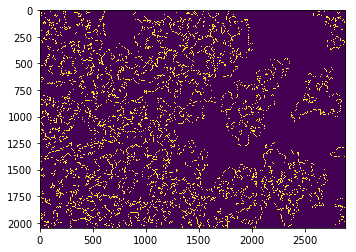

In [33]:
plt.imshow(result)